# Conceitos básicos de estatística

Esse notebook é composto por exercícios que te ajudarão a entender conceitos básicos de estatística. 

A estatística nos ajuda a responder perguntas que queremos fazer aos dados. Esse ano, 2022, celebramos 90 anos da conquista do voto feminino, ou seja, apenas em 1932 nós mulheres conquistamos com muita luta o direito ao voto, naquele momento apenas as mulheres casadas com autorização do marido, viúvas ou solteiras com renda própria podiam votar. O sufrágio universal veio dois anos depois, em 1934, onde todas nós pudemos votar, sermos votadas e eleitas para cargos políticos. Por essa razão, vamos aprender conceitos básicos de estatística usando os dados abertos do Tribunal Superior Eleitoral, especificamente os dados das candidaturas para a Câmara dos Vereadores de Recife em 2020. É a esse conjunto de dados que vamos realizar nossas perguntas e respondê-las usando os conceitos que aprenderemos ao longo desse vídeo aplicados com a biblioteca Pandas.

Conteúdo: 

- Medidas de tendência central;
- Medidas de dispersão;
- Valores discrepantes (outliers); 
- Coeficientes de correlação.


Para iniciar, vamos importar as bibliotecas a serem utilizadas para análise dos dados:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Importaremos o conjunto de dados:

In [2]:
df_candidaturas = pd.read_csv('dados/consulta_cand_vereadoras_2020_PE_reduzida.csv')

Exploraremos as primeiras informações:

In [3]:
df_candidaturas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ANO_ELEICAO               896 non-null    int64 
 1   CD_TIPO_ELEICAO           896 non-null    int64 
 2   NM_TIPO_ELEICAO           896 non-null    object
 3   TP_ABRANGENCIA            896 non-null    object
 4   SG_UF                     896 non-null    object
 5   SG_UE                     896 non-null    int64 
 6   NM_UE                     896 non-null    object
 7   CD_CARGO                  896 non-null    int64 
 8   DS_CARGO                  896 non-null    object
 9   CD_SITUACAO_CANDIDATURA   896 non-null    int64 
 10  DS_SITUACAO_CANDIDATURA   896 non-null    object
 11  CD_DETALHE_SITUACAO_CAND  896 non-null    int64 
 12  DS_DETALHE_SITUACAO_CAND  896 non-null    object
 13  TP_AGREMIACAO             896 non-null    object
 14  NR_PARTIDO                

Por padrão o Pandas apresenta até 20 colunas, como nosso dataframe tem mais colunas, retiraremos essa limitação

In [4]:
pd.options.display.max_columns = None

Agora, leremos algumas amostras

In [5]:
df_candidaturas.head()

,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NR_IDADE_DATA_POSSE,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,VR_DESPESA_MAX_CAMPANHA
0,2020,2,ELEIÇÃO ORDINÁRIA,MUNICIPAL,PE,25313,RECIFE,13,VEREADOR,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,17,PSL,73,2,MASCULINO,4,ENSINO FUNDAMENTAL COMPLETO,1,SOLTEIRO(A),2,PRETA,1011149
1,2020,2,ELEIÇÃO ORDINÁRIA,MUNICIPAL,PE,25313,RECIFE,13,VEREADOR,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,19,PODE,58,4,FEMININO,4,ENSINO FUNDAMENTAL COMPLETO,3,CASADO(A),3,PARDA,1011149
2,2020,2,ELEIÇÃO ORDINÁRIA,MUNICIPAL,PE,25313,RECIFE,13,VEREADOR,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,13,PT,35,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),3,PARDA,1011149
3,2020,2,ELEIÇÃO ORDINÁRIA,MUNICIPAL,PE,25313,RECIFE,13,VEREADOR,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,17,PSL,47,4,FEMININO,8,SUPERIOR COMPLETO,9,DIVORCIADO(A),3,PARDA,1011149
4,2020,2,ELEIÇÃO ORDINÁRIA,MUNICIPAL,PE,25313,RECIFE,13,VEREADOR,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,23,CIDADANIA,49,2,MASCULINO,3,ENSINO FUNDAMENTAL INCOMPLETO,3,CASADO(A),2,PRETA,1011149


## Distribuição estatística
Para começar vamos observar graficamente a distribuição estatística dos dados da coluna NR_IDADE_DATA_POSSE que representa a idade que as pessoas candidatas teriam na data de sua posse. Essa curva é feita a partir da quantidade de vezes que cada idade aparece na coluna NR_IDADE_DATA_POSSE, ou seja, existem mais pessoas candidatas com 40 anos do que com 80.

<AxesSubplot:ylabel='Density'>

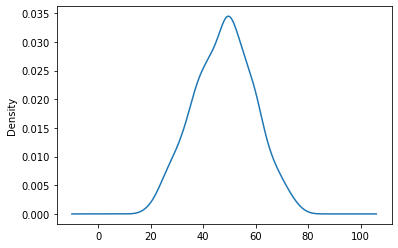

In [6]:
df_candidaturas['NR_IDADE_DATA_POSSE'].plot.density()

Esse tipo de distribuição que o gráfico só tem 1 pico, chamamos de distribuição normal. 

## Medidas de tendência central
As medidas de tendência central servem para determinar o valor central de uma distribuição e representar o centro de um conjunto de dados. As mais utilizadas são: média, mediana e moda.

### Moda
Valor que mais se repete em um conjunto de dados e também pode ser usada em dados qualitativos. Vamos descobrir a moda da coluna `NR_IDADE_DATA_POSSE`

In [7]:
df_candidaturas['NR_IDADE_DATA_POSSE'].mode()

0    51
Name: NR_IDADE_DATA_POSSE, dtype: int64

### Média
Soma de todos os valores do conjunto de dados, dividido pela quantidade de valores do conjunto. Essa medida é muito afetada por valores discrepantes, então seu uso é recomendado em conjuntos de dados com valores mais uniformes. Vamos ver a média etária das candidaturas para vereadores no dia da posse.

In [8]:
df_candidaturas['NR_IDADE_DATA_POSSE'].std() 

11.340307428628996

### Média
Soma de todos os valores do conjunto de dados, dividido pela quantidade de valores do conjunto. Essa medida é muito afetada por valores discrepantes, então seu uso é recomendado em conjuntos de dados com valores mais uniformes. Vamos descobrir a média etária das candidaturas para vereadores no dia da posse.

In [9]:
df_candidaturas['NR_IDADE_DATA_POSSE'].mean()

47.956473214285715

### Mediana
Valor que ocupa a posição central do conjunto de dados, após a ordenação dos valores em ordem crescente. Isso quer dizer que, após a ordenação dos valores, aquele localizado exatamente no meio dessa lista é a mediana. Isso significa que 50% dos valores são menores do que ela e 50% são maiores.

In [10]:
df_candidaturas['NR_IDADE_DATA_POSSE'].median()

48.0

## Medidas de dispersão
As medidas de dispersão medem o grau de dispersão dos valores em uma distribuição, ou seja, pretendem avaliar quanto os dados diferem entre si. As mais usadas são: desvio padrão e variância.

### Variância
Indica quanto o conjunto de dados desvia da sua média, ou seja, quão distante cada valor do conjunto está da média. Quanto menor é a variância, mais próximo os valores estão da média.

In [11]:
df_candidaturas['NR_IDADE_DATA_POSSE'].var()

128.60257257581802

### Desvio padrão
Indica o grau de dispersão de um conjunto de dados, ou seja, o quanto ele é uniforme. Quanto menor for o desvio padrão, mais homogêneos são os dados. Essa medida é a raiz quadrada da variância.

In [12]:
df_candidaturas['NR_IDADE_DATA_POSSE'].std()

11.340307428628996

## Valores discrepantes (outliers)
São valores numericamente distantes da maior parte do conjunto de dados, ou seja, valores extremos. Para determinar valores discrepantes, usamos como parâmetro a medida de intervalo interquartil, que determina a dispersão dos dados em torno da mediana.

Como vimos anteriormente, a mediana é o valor que ocupa a posição central do conjunto de dados, após a ordenação dos valores em ordem crescente. Após essa ordenação também podemos determinar o primeiro e o terceiro quartil e , consequentemente, o intervalo entre eles que chamamos de intervalo interquartil, que é a diferença dos valores do 3. e 1. quartil.

In [13]:
primeiro_quartil = df_candidaturas['NR_IDADE_DATA_POSSE'].quantile(0.25)
primeiro_quartil

40.0

In [14]:
terceiro_quartil = df_candidaturas['NR_IDADE_DATA_POSSE'].quantile(0.75)
terceiro_quartil

56.0

In [15]:
intervalo_interquartil = terceiro_quartil - primeiro_quartil
intervalo_interquartil

16.0

## Correlação
Às vezes desejamos analisar um dado cujo comportamento está sendo influenciado de algum modo por outros. Esse fenômeno chamamos de correlação. Ela pode ser positiva, negativa ou nula.
Para medir a correlação usamos o “coeficiente de correlação, um valor numérico que indica o grau e a direção da tendência de associação entre as variáveis” (Ciência de Dados na Educação Pública, 2021)

## Coeficiente de Pearson
Também é conhecido como correlação linear, é usado para verificar a correlação entre duas variáveis quantitativas. É expresso através de valores situados entre -1 e 1; quanto mais extremos os valores mais forte é a correlação entre as variáveis e quanto mais próximo de zero, mais fraca, sendo 0 a indicação de que não há correlação.

Vamos verificar o coeficiente de correlação entre a variável NR_IDADE_DATA_POSSE e CD_ESTADO_CIVIL, tendo como hipótese que a idade tem uma correlação forte com o estado civil das pessoas candidatas. Só é possível realizar essa correlação porque cada estado civil está relacionado a um código numérico, conforme apresentado no dicionário de dados:

1: SOLTEIRO(A), 3: CASADO(A), 5: VIÚVO(A), 7: SEPARADO(A) JUDICIALMENTE, 9: DIVORCIADO(A)

In [16]:
df_candidaturas[['NR_IDADE_DATA_POSSE', 'CD_ESTADO_CIVIL']].corr(method='pearson')

,NR_IDADE_DATA_POSSE,CD_ESTADO_CIVIL
NR_IDADE_DATA_POSSE,1.000000,0.235442
CD_ESTADO_CIVIL,0.235442,1.000000


Observamos que a correlação linear é fraca usando o coeficiente de Pearson. Então, nossa hipótese não foi comprovada, não é possível dizer que existe correlação entre as variáveis analisadas.

Espero que esse notebook tenha te ajudado a entender alguns conceitos básicos de estatística. Até mais!